In [19]:
import matplotlib.pyplot as plt
import numpy as np
import bz2

from numpy import loadtxt, math, array, zeros
from pylab import plot, show, xlim, ylim, grid, exp
from scipy.optimize import leastsq
import random

749601
<class 'numpy.ndarray'>
3385 3385


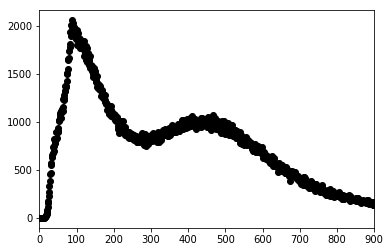

In [27]:
###############################################################
# lee el archivo .bz2 y guarda la primera columna de numeros
# teniendo en cuenta que solo lee pulsos con 12 bines
n = 0
datos = []
aux = 0
auxDat = []
aux2 = 0
aux3 = 0
with bz2.open("Chitaga.dat.bz2", "rt" ) as bz_file:
    for line in bz_file:
        rline = line.rstrip('\n').split(' ')
        if rline[0] != "#":
            auxDat.append(int(rline[0])-50)
            aux += 1
        if rline[0] == "#" and rline[1] == "t":
                aux2 += 1    
        if aux == 12 and rline[0] == "#":
            datos.append(auxDat)
            aux = 0
            auxDat = []
        if aux3 < aux2:
            auxDat = []
            aux = 0
            aux3 = aux2
        #n += 1
        #if n == 2000:
        #    break
#Xaxis = np.linspace(0,12,12)
#for i in range(len(datos)):
#    plt.plot(Xaxis,datos[i])
datos = np.array(datos)
print(len(datos))
print(type(datos))
Q = np.zeros(len(datos))
sum =0
for i in range(len(datos)):
    for j in range(12):
        sum += datos[i][j]
    Q[i] = sum
    sum = 0
##############################################
Datmin = min(Q)
Datmax = max(Q)
nbins = int(Datmax+1)
binwidth = (Datmax - Datmin)/nbins
#crear un histograma
hist1 = []
hist = []
pos = []
[hist1.append(0) for i in range(nbins)]
# determina los valores del histograma
for i in Q:
    hist1[ int(i) ] += 1
# elimina la cantida de ceros del histograma
# teniendo en cuenta que un dato se repite almenos una vez
# es decir un dato existe una vez
for i in range(len(hist1)):
    if hist1[i] != 0:
        pos.append(i)
        hist.append(hist1[i])
outDisdat = open("datafile.dat","w")
for i in range(len(hist)):
    outDisdat.write('%0.4f\n' % (Q[i]))
outDisdat.close()
#plt.step(pos,hist, where = 'mid', color = 'b', linewidth = 1)
plt.plot(pos,hist,'ko')
plt.xlim([0,900])
print(len(pos),len(hist))

(0, 900)

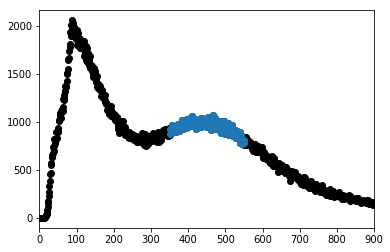

In [48]:
Xmin = 350
Xmax = 550
plt.plot(pos,hist,'ko')
plt.plot(pos[Xmin:Xmax],hist[Xmin:Xmax],'o')
plt.xlim([0,900])

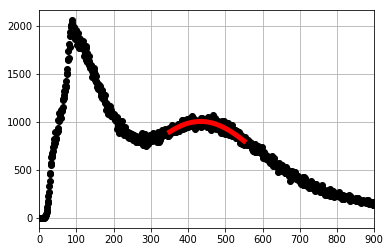

media = 433.6; sigma = 173.2


In [49]:
fitfunc = lambda p, x: p[0]*exp(-0.5*((x-p[1])*p[2])*((x-p[1])*p[2]))
errfunc = lambda p, x, y: (y - fitfunc(p, x))

init = [1.e3, 450., 1.]

out = leastsq(errfunc, init, args=(pos[Xmin:Xmax], hist[Xmin:Xmax]))
c = out[0]


plot(pos,hist,'ko')
plot(pos[Xmin:Xmax], fitfunc(c, pos[Xmin:Xmax]), 'r-', linewidth=5 )
xlim(1, 900)
grid("on")

show()

print('media = %0.1f; sigma = %0.1f' % (c[1], abs(1./c[2])) )

In [71]:
filtro = []
med = c[1]
sigma = abs(1./c[2])
cont = 0
for i in range(len(Q)):
    if Q[i] >= med-sigma/2 and Q[i] <= med +sigma/2:
        cont +=1 # contador de cargas
        filtro.append(datos[i])

In [67]:
cant1 = np.sum(hist[Xmin:Xmax])
cant2 = cont
print(cant1,cant2)

189315 166737


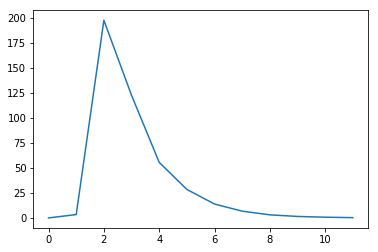

In [73]:
sum = np.zeros(12)
for i in range(cont):
    for j in range(12):
        sum[j] += filtro[i][j]
pulsoProm = sum*(1/cont)
plot(pulsoProm)

In [84]:
datosAjust = pulsoProm[2:6]
xdat = np.linspace(2,6,len(datosAjust))
outDisdat = open("datafile_01.dat","w")
for i in range(len(Dat)):
    outDisdat.write('%0.4f %0.4f\n' % (xdat[i],datosAjust[i]))
outDisdat.close()

[[  2.     197.8534]
 [  3.3333 122.6605]
 [  4.6667  55.567 ]
 [  6.      28.4734]]
2.0037596036378162
distribución chi cuadrada: 1.6238


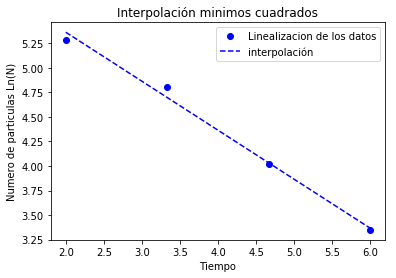

In [89]:
from Mincuad import Minimoscuadrados
Dat = np.loadtxt("datafile_01.dat")
D = np.copy(Dat) 
print(D)
Mc = Minimoscuadrados()
[a1,a2,sigma] = Mc.min(D)
x = np.linspace(min(D[:,0]),max(D[:,0]),100)
g = a1 +a2*x
print(-1/a2)
chi = 0.
for i in range(len(D[:,0])):
    chi += ((D[i,1]-g[i])/sigma[i])**2
print ("distribución chi cuadrada: %0.4f" %(chi))
plt.plot(D[:,0],D[:,1],'bo')
plt.plot(x,g,'b--')
plt.title('Interpolación minimos cuadrados')
plt.ylabel('Numero de particulas Ln(N)')
plt.xlabel('Tiempo')
plt.legend(('Linealizacion de los datos','interpolación'),loc='upper right')

ecuación de la recta: 6.36117 + (-0.49906)*x
vida media de la particula: 2.0037596036 


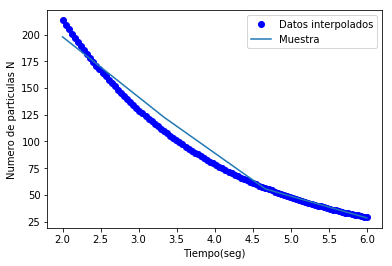

In [94]:
# N(t) = N_o exp(- \lambda t)
N = np.exp(a1+a2*x)
plt.plot(x,N,'bo')
plt.plot(Dat[:,0],Dat[:,1])
plt.ylabel('Numero de particulas N')
plt.xlabel('Tiempo(seg)')
plt.legend(('Datos interpolados','Muestra'),loc='upper right')

print("ecuación de la recta: %0.5f + (%0.5f)*x" %(a1,a2))
print ("vida media de la particula: %1.10f " %(-1/a2))